### Loading Library

In [1]:
import os
import numpy as np
import pandas as pd
from SignalProcessor import SignalProcessorClass
import NoiseEvalUtil as NEUtil
import argparse
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings("ignore", "Possible clipped samples in output.")
warnings.filterwarnings("ignore", "use_inf_as_na")

### Generating Data from Setting the NOISE condition of 5 times glitch and 60dB noise

In [3]:
bitrate = 64
samplerate = 48000
solution = [60,60,1,5]
base_dir = "/home/codecrack/Jnotebook/DAFX25_48k_16"

### PEAQ Basic

In [4]:
# Define the top-level directory


# List all first-layer folders
# List all first-layer folders
ignore = {
    'Beatles','Britpop','Country1','Country2',
    'Disco','Gospel','Hendrix',
    'Punk','Reggae','Rock','Rockabilly'
}#exclude Grunge

first_layer_dirs = [
    os.path.join(base_dir, name) + '/'
    for name in os.listdir(base_dir)
    if (
       os.path.isdir(os.path.join(base_dir, name))
       and name not in ignore
    )
]

# Print results
for Mixing_Path_48k_16bit in first_layer_dirs:
    Noise_Generator_MP3_48k_16bit = SignalProcessorClass(filename="mixture.wav", foldpath=Mixing_Path_48k_16bit, TrackType = NEUtil.MixingType.File,bitdepth="PCM_16")
    Referece_File_48k_16bit = Noise_Generator_MP3_48k_16bit.TestNoisedOnlyFile([0,0,0,0],"Ref_Var.wav")
    Mp3_Referece_File_48k_16bit = Noise_Generator_MP3_48k_16bit.GeneratingMP3RefFile(Referece_File_48k_16bit, bitrate)

    while (os.path.isfile(Referece_File_48k_16bit) and os.path.isfile(Mp3_Referece_File_48k_16bit)):
        print ("file now ready")
        break
    
    hn = solution[0]
    wn = solution[1]
    cp = solution[2]
    do = solution[3]
    PEAQbasic_list_Noise = []
    Noisefilename = f'audio_mixing_HN_{hn}_WN{wn}_CP{cp}_DO{do}.wav'
    
    for x in range(1,101):
        Gener_Audio = Noise_Generator_MP3_48k_16bit.TestNoisedOnlyFile(solution,Noisefilename)
        score = Noise_Generator_MP3_48k_16bit.MeasurePEAQOutputsVsRef(Gener_Audio,64,Mp3_Referece_File_48k_16bit)
        PEAQbasic_list_Noise.append(float(score))
        print(f"PEAQ Result is {score}")
    PEAQBasic_Score = pd.DataFrame({'PEAQBasic_Score': PEAQbasic_list_Noise})
    PEAQBasic_Score = PEAQBasic_Score.apply(pd.to_numeric, errors='coerce')
    PEAQBasic_Score.to_csv(f'{Mixing_Path_48k_16bit}/peaq_basic_vartest.csv', index=False)

Audio duration orginal is 13.78125 seconds, now is the 8.0, the audio changing to the MONO
After LUFS, the mixing ouput in the RMS, Total: -9.72dB, Clipping Ratio&Cliped Num: (0.0009088541666666666, 349)
file now ready
There are 12000 packages
After LUFS, the mixing ouput in the RMS, Total: -9.76dB, Clipping Ratio&Cliped Num: (0.0, 0)
PEAQ Result is -3.318
There are 12000 packages
After LUFS, the mixing ouput in the RMS, Total: -9.76dB, Clipping Ratio&Cliped Num: (0.0, 0)
PEAQ Result is -2.877
There are 12000 packages
After LUFS, the mixing ouput in the RMS, Total: -9.76dB, Clipping Ratio&Cliped Num: (0.0, 0)
PEAQ Result is -2.058
There are 12000 packages
After LUFS, the mixing ouput in the RMS, Total: -9.76dB, Clipping Ratio&Cliped Num: (0.0, 0)
PEAQ Result is -1.933
There are 12000 packages
After LUFS, the mixing ouput in the RMS, Total: -9.76dB, Clipping Ratio&Cliped Num: (0.0, 0)
PEAQ Result is -2.173
There are 12000 packages
After LUFS, the mixing ouput in the RMS, Total: -9.76dB,

### PEAQ Adv

In [5]:
# Define the top-level directory


# List all first-layer folders
# List all first-layer folders
ignore = {
    'Beatles','Britpop','Country1','Country2',
    'Disco','Gospel','Hendrix',
    'Punk','Reggae','Rock','Rockabilly'
}#exclude Grunge

first_layer_dirs = [
    os.path.join(base_dir, name) + '/'
    for name in os.listdir(base_dir)
    if (
       os.path.isdir(os.path.join(base_dir, name))
       and name not in ignore
    )
]

# Print results
for Mixing_Path_48k_16bit in first_layer_dirs:
    Noise_Generator_MP3_48k_16bit = SignalProcessorClass(filename="mixture.wav", foldpath=Mixing_Path_48k_16bit, TrackType = NEUtil.MixingType.File,bitdepth="PCM_16")
    Referece_File_48k_16bit = Noise_Generator_MP3_48k_16bit.TestNoisedOnlyFile([0,0,0,0],"Ref_Var.wav")
    Mp3_Referece_File_48k_16bit = Noise_Generator_MP3_48k_16bit.GeneratingMP3RefFile(Referece_File_48k_16bit, bitrate)

    while (os.path.isfile(Referece_File_48k_16bit) and os.path.isfile(Mp3_Referece_File_48k_16bit)):
        print ("file now ready")
        break
    
    hn = solution[0]
    wn = solution[1]
    cp = solution[2]
    do = solution[3]
    PEAQadv_list_Noise = []
    Noisefilename = f'audio_mixing_HN_{hn}_WN{wn}_CP{cp}_DO{do}.wav'
    
    for x in range(1,101):
        Gener_Audio = Noise_Generator_MP3_48k_16bit.TestNoisedOnlyFile(solution,Noisefilename)
        score = Noise_Generator_MP3_48k_16bit.MeasurePEAQOutputsVsRef(Gener_Audio,64,Mp3_Referece_File_48k_16bit,'advanced')
        PEAQadv_list_Noise.append(float(score))
        print(f"PEAQ Result is {score}")
    PEAQadv_Score = pd.DataFrame({'PEAQADV_Score': PEAQadv_list_Noise})
    PEAQadv_Score = PEAQadv_Score.apply(pd.to_numeric, errors='coerce')
    PEAQadv_Score.to_csv(f'{Mixing_Path_48k_16bit}/peaq_adv_vartest.csv', index=False)



Audio duration orginal is 13.78125 seconds, now is the 8.0, the audio changing to the MONO
After LUFS, the mixing ouput in the RMS, Total: -9.72dB, Clipping Ratio&Cliped Num: (0.0009088541666666666, 349)
file now ready
There are 12000 packages
After LUFS, the mixing ouput in the RMS, Total: -9.76dB, Clipping Ratio&Cliped Num: (0.0, 0)
PEAQ Result is -1.103
There are 12000 packages
After LUFS, the mixing ouput in the RMS, Total: -9.76dB, Clipping Ratio&Cliped Num: (0.0, 0)
PEAQ Result is -1.021
There are 12000 packages
After LUFS, the mixing ouput in the RMS, Total: -9.76dB, Clipping Ratio&Cliped Num: (0.0, 0)
PEAQ Result is -0.546
There are 12000 packages
After LUFS, the mixing ouput in the RMS, Total: -9.76dB, Clipping Ratio&Cliped Num: (0.0, 0)
PEAQ Result is -1.055
There are 12000 packages
After LUFS, the mixing ouput in the RMS, Total: -9.76dB, Clipping Ratio&Cliped Num: (0.0, 0)
PEAQ Result is -1.029
There are 12000 packages
After LUFS, the mixing ouput in the RMS, Total: -9.76dB,

### PEMO 

In [6]:


# List all first-layer folders
# List all first-layer folders
ignore = {
    'Beatles','Britpop','Country1','Country2',
    'Disco','Gospel','Hendrix',
    'Punk','Reggae','Rock','Rockabilly'
}#exclude Grunge

first_layer_dirs = [
    os.path.join(base_dir, name) + '/'
    for name in os.listdir(base_dir)
    if (
       os.path.isdir(os.path.join(base_dir, name))
       and name not in ignore
    )
]

# Print results
for Mixing_Path_48k_16bit in first_layer_dirs:
    hn = solution[0]
    wn = solution[1]
    cp = solution[2]
    do = solution[3]
    Noise_Generator_MP3_48k_16bit = SignalProcessorClass(filename="mixture.wav", foldpath=Mixing_Path_48k_16bit, TrackType = NEUtil.MixingType.File,bitdepth="PCM_16")
    Referece_File_48k_16bit = Noise_Generator_MP3_48k_16bit.TestNoisedOnlyFile([0,0,0,0],"Ref_Var.wav")
    Noisefilename = f'audio_mixing_HN_{hn}_WN{wn}_CP{cp}_DO{do}'
    
    for x in range(1,101):
        PEMOFILE = f'{Noisefilename}_{x}.wav'
        Gener_Audio = Noise_Generator_MP3_48k_16bit.TestNoisedOnlyFile(solution,PEMOFILE)
        Gener_Audio_mp3 = Noise_Generator_MP3_48k_16bit.GeneratingMP3RefFile(Gener_Audio,64)

Audio duration orginal is 13.78125 seconds, now is the 8.0, the audio changing to the MONO
After LUFS, the mixing ouput in the RMS, Total: -9.72dB, Clipping Ratio&Cliped Num: (0.0009088541666666666, 349)
There are 12000 packages
After LUFS, the mixing ouput in the RMS, Total: -9.76dB, Clipping Ratio&Cliped Num: (0.0, 0)
There are 12000 packages
After LUFS, the mixing ouput in the RMS, Total: -9.76dB, Clipping Ratio&Cliped Num: (0.0, 0)
There are 12000 packages
After LUFS, the mixing ouput in the RMS, Total: -9.76dB, Clipping Ratio&Cliped Num: (0.0, 0)
There are 12000 packages
After LUFS, the mixing ouput in the RMS, Total: -9.76dB, Clipping Ratio&Cliped Num: (0.0, 0)
There are 12000 packages
After LUFS, the mixing ouput in the RMS, Total: -9.76dB, Clipping Ratio&Cliped Num: (0.0, 0)
There are 12000 packages
After LUFS, the mixing ouput in the RMS, Total: -9.76dB, Clipping Ratio&Cliped Num: (0.0, 0)
There are 12000 packages
After LUFS, the mixing ouput in the RMS, Total: -9.76dB, Clippi

In [7]:
Gener_Audio_mp3

'/home/codecrack/Jnotebook/DAFX25_48k_16/Grunge/Mixing_Result_Mp3_Wav/audio_mixing_HN_60_WN60_CP1_DO5_100_64kbps.wav'

### HAAQI

In [8]:
import clarity
import clarity.evaluator.haaqi as haaqi
import librosa
from clarity.utils.audiogram import Audiogram

In [9]:
levels_1 = np.array([0, 0, 0, 0, 0, 0, 0, 0])
audiogram_NH = Audiogram(levels=levels_1)

In [10]:
# Define the top-level directory

# List all first-layer folders
# List all first-layer folders
ignore = {
    'Beatles','Britpop','Country1','Country2',
    'Disco','Gospel','Hendrix',
    'Punk','Reggae','Rock','Rockabilly'
}#exclude Grunge

first_layer_dirs = [
    os.path.join(base_dir, name) + '/'
    for name in os.listdir(base_dir)
    if (
       os.path.isdir(os.path.join(base_dir, name))
       and name not in ignore
    )
]

# Print results
for Mixing_Path_48k_16bit in first_layer_dirs:
    Noise_Generator_MP3_48k_16bit = SignalProcessorClass(filename="mixture.wav", foldpath=Mixing_Path_48k_16bit, TrackType = NEUtil.MixingType.File,bitdepth="PCM_16")
    Referece_File_48k_16bit = Noise_Generator_MP3_48k_16bit.TestNoisedOnlyFile([0,0,0,0],"Ref_Var.wav")
    Mp3_Referece_File_48k_16bit = Noise_Generator_MP3_48k_16bit.GeneratingMP3RefFile(Referece_File_48k_16bit, bitrate)

    while (os.path.isfile(Referece_File_48k_16bit) and os.path.isfile(Mp3_Referece_File_48k_16bit)):
        print ("file now ready")
        break
    
    hn = solution[0]
    wn = solution[1]
    cp = solution[2]
    do = solution[3]
    Noisefilename = f'audio_mixing_HN_{hn}_WN{wn}_CP{cp}_DO{do}.wav'
    Mp3_Referece_data, sample_rate = librosa.load(Mp3_Referece_File_48k_16bit, sr=None)
    
    Haaqi_list = []
    #Visqool_list = []
    for x in range(1,101):
        Gener_Audio = Noise_Generator_MP3_48k_16bit.TestNoisedOnlyFile(solution,Noisefilename)
        Gener_Audio_mp3 = Noise_Generator_MP3_48k_16bit.GeneratingMP3RefFile(Gener_Audio,64)
        Gener_Audio_mp3_HAAQI, sample_rate = librosa.load(Gener_Audio_mp3, sr=None)
        HAAQI_score = round(haaqi.compute_haaqi(Gener_Audio_mp3_HAAQI,Mp3_Referece_data,sample_rate,sample_rate,audiogram_NH),2)
        Haaqi_list.append(HAAQI_score)
        print(f"HAAQI Result is {HAAQI_score}")
    Haaqi_Score = pd.DataFrame({'Haaqi_Score': Haaqi_list})
    Haaqi_Score = Haaqi_Score.apply(pd.to_numeric, errors='coerce')
    Haaqi_Score.to_csv(f'{Mixing_Path_48k_16bit}/haaqi_vartest.csv', index=False)

Audio duration orginal is 13.78125 seconds, now is the 8.0, the audio changing to the MONO
After LUFS, the mixing ouput in the RMS, Total: -9.72dB, Clipping Ratio&Cliped Num: (0.0009088541666666666, 349)
file now ready
There are 12000 packages
After LUFS, the mixing ouput in the RMS, Total: -9.76dB, Clipping Ratio&Cliped Num: (0.0, 0)
HAAQI Result is 0.82
There are 12000 packages
After LUFS, the mixing ouput in the RMS, Total: -9.76dB, Clipping Ratio&Cliped Num: (0.0, 0)
HAAQI Result is 0.83
There are 12000 packages
After LUFS, the mixing ouput in the RMS, Total: -9.76dB, Clipping Ratio&Cliped Num: (0.0, 0)
HAAQI Result is 0.8
There are 12000 packages
After LUFS, the mixing ouput in the RMS, Total: -9.76dB, Clipping Ratio&Cliped Num: (0.0, 0)
HAAQI Result is 0.84
There are 12000 packages
After LUFS, the mixing ouput in the RMS, Total: -9.76dB, Clipping Ratio&Cliped Num: (0.0, 0)
HAAQI Result is 0.82
There are 12000 packages
After LUFS, the mixing ouput in the RMS, Total: -9.76dB, Clipp

### Visqol

In [11]:
##Loading the necessary Package
import argbind
import torch
from audiotools import AudioSignal
from audiotools import metrics


# List all first-layer folders
# List all first-layer folders
ignore = {
    'Beatles','Britpop','Country1','Country2',
    'Disco','Gospel','Hendrix',
    'Punk','Reggae','Rock','Rockabilly'
}#exclude Grunge

first_layer_dirs = [
    os.path.join(base_dir, name) + '/'
    for name in os.listdir(base_dir)
    if (
       os.path.isdir(os.path.join(base_dir, name))
       and name not in ignore
    )
]

# Print results
for Mixing_Path_48k_16bit in first_layer_dirs:
    Noise_Generator_MP3_48k_16bit = SignalProcessorClass(filename="mixture.wav", foldpath=Mixing_Path_48k_16bit, TrackType = NEUtil.MixingType.File,bitdepth="PCM_16")
    Referece_File_48k_16bit = Noise_Generator_MP3_48k_16bit.TestNoisedOnlyFile([0,0,0,0],"Ref_Var.wav")
    Mp3_Referece_File_48k_16bit = Noise_Generator_MP3_48k_16bit.GeneratingMP3RefFile(Referece_File_48k_16bit, bitrate)
#    AudioFold_48k_16bit = Mixing_Path_48k_16bit + '/Mixing_Result_Mp3_Wav/'
#    Reference_48k_16bit = AudioSignal(Referece_File_48k_16bit)
    Mp3_Referece_48k_16bit = AudioSignal(Mp3_Referece_File_48k_16bit)

    hn = solution[0]
    wn = solution[1]
    cp = solution[2]
    do = solution[3]
    Visqol_list = []
    Noisefilename = f'audio_mixing_HN_{hn}_WN{wn}_CP{cp}_DO{do}.wav'

    for x in range(1,101):
        Gener_Audio = Noise_Generator_MP3_48k_16bit.TestNoisedOnlyFile(solution,Noisefilename)
        Gener_Audio_mp3 = Noise_Generator_MP3_48k_16bit.GeneratingMP3RefFile(Gener_Audio,64)        
        Gener_Audio_vis = AudioSignal(Gener_Audio_mp3)
        Visqol_score = metrics.quality.visqol(Mp3_Referece_48k_16bit, Gener_Audio_vis).numpy()
        ODG_score = round(float(Visqol_score-5),2)
        print(f"The Visqol value is {ODG_score}")
        Visqol_list.append(ODG_score)
    Vis_Score = pd.DataFrame({'Vis_Score': Visqol_list})
    Vis_Score = Vis_Score.apply(pd.to_numeric, errors='coerce')
    Vis_Score.to_csv(f'{Mixing_Path_48k_16bit}/visqol_vartest.csv', index=False)


Audio duration orginal is 13.78125 seconds, now is the 8.0, the audio changing to the MONO
After LUFS, the mixing ouput in the RMS, Total: -9.72dB, Clipping Ratio&Cliped Num: (0.0009088541666666666, 349)
There are 12000 packages
After LUFS, the mixing ouput in the RMS, Total: -9.76dB, Clipping Ratio&Cliped Num: (0.0, 0)
The Visqol value is -0.38
There are 12000 packages
After LUFS, the mixing ouput in the RMS, Total: -9.76dB, Clipping Ratio&Cliped Num: (0.0, 0)
The Visqol value is -0.37
There are 12000 packages
After LUFS, the mixing ouput in the RMS, Total: -9.76dB, Clipping Ratio&Cliped Num: (0.0, 0)
The Visqol value is -0.38
There are 12000 packages
After LUFS, the mixing ouput in the RMS, Total: -9.76dB, Clipping Ratio&Cliped Num: (0.0, 0)
The Visqol value is -0.44
There are 12000 packages
After LUFS, the mixing ouput in the RMS, Total: -9.75dB, Clipping Ratio&Cliped Num: (0.0, 0)
The Visqol value is -0.37
There are 12000 packages
After LUFS, the mixing ouput in the RMS, Total: -9.

# READING DATA and Painting

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import seaborn as sns

# Base directory containing project subfolders
base_dir = Path('/home/codecrack/Jnotebook/DAFX25_48k_16')  # adjust to your root directory
projects = [p for p in base_dir.iterdir() if p.is_dir()]

# Metrics and their filename patterns
def metric_map():
    return {
        'PEAQ Basic': 'peaq_basic_vartest.csv',
        'PEAQ Advance': 'peaq_adv_vartest.csv',
        'PEMO': 'pemo_vartest.csv',
        'HAAQI': 'haaqi_vartest.csv',
        'ViSQOL': 'visqol_vartest.csv'
    }

# Metrics requiring normalization
norm_metrics = {'PEAQ Basic', 'PEAQ Advance', 'PEMO', 'ViSQOL'}

# Collect data for each metric across projects
metrics = metric_map()
metric_data = {name: [] for name in metrics}
project_names = [proj.name for proj in projects]

for proj in projects:
    for metric_name, fname in metrics.items():
        file_path = proj / fname
        if not file_path.exists():
            raise FileNotFoundError(f"Missing {fname} in project {proj.name}")

        # Read metric values
        if metric_name == 'PEMO':
            df = pd.read_csv(file_path, header=None)
            values = df.values.flatten()
        else:
            df = pd.read_csv(file_path)
            # pick the first numeric column
            numeric_cols = df.select_dtypes(include='number').columns
            if not numeric_cols.any():
                raise ValueError(f"No numeric column found in {fname}")
            values = df[numeric_cols[0]].values

        # Normalize if required
        if metric_name in norm_metrics:
            values = (values + 4) / 4

        metric_data[metric_name].append(values)


In [13]:
len(projects)

12

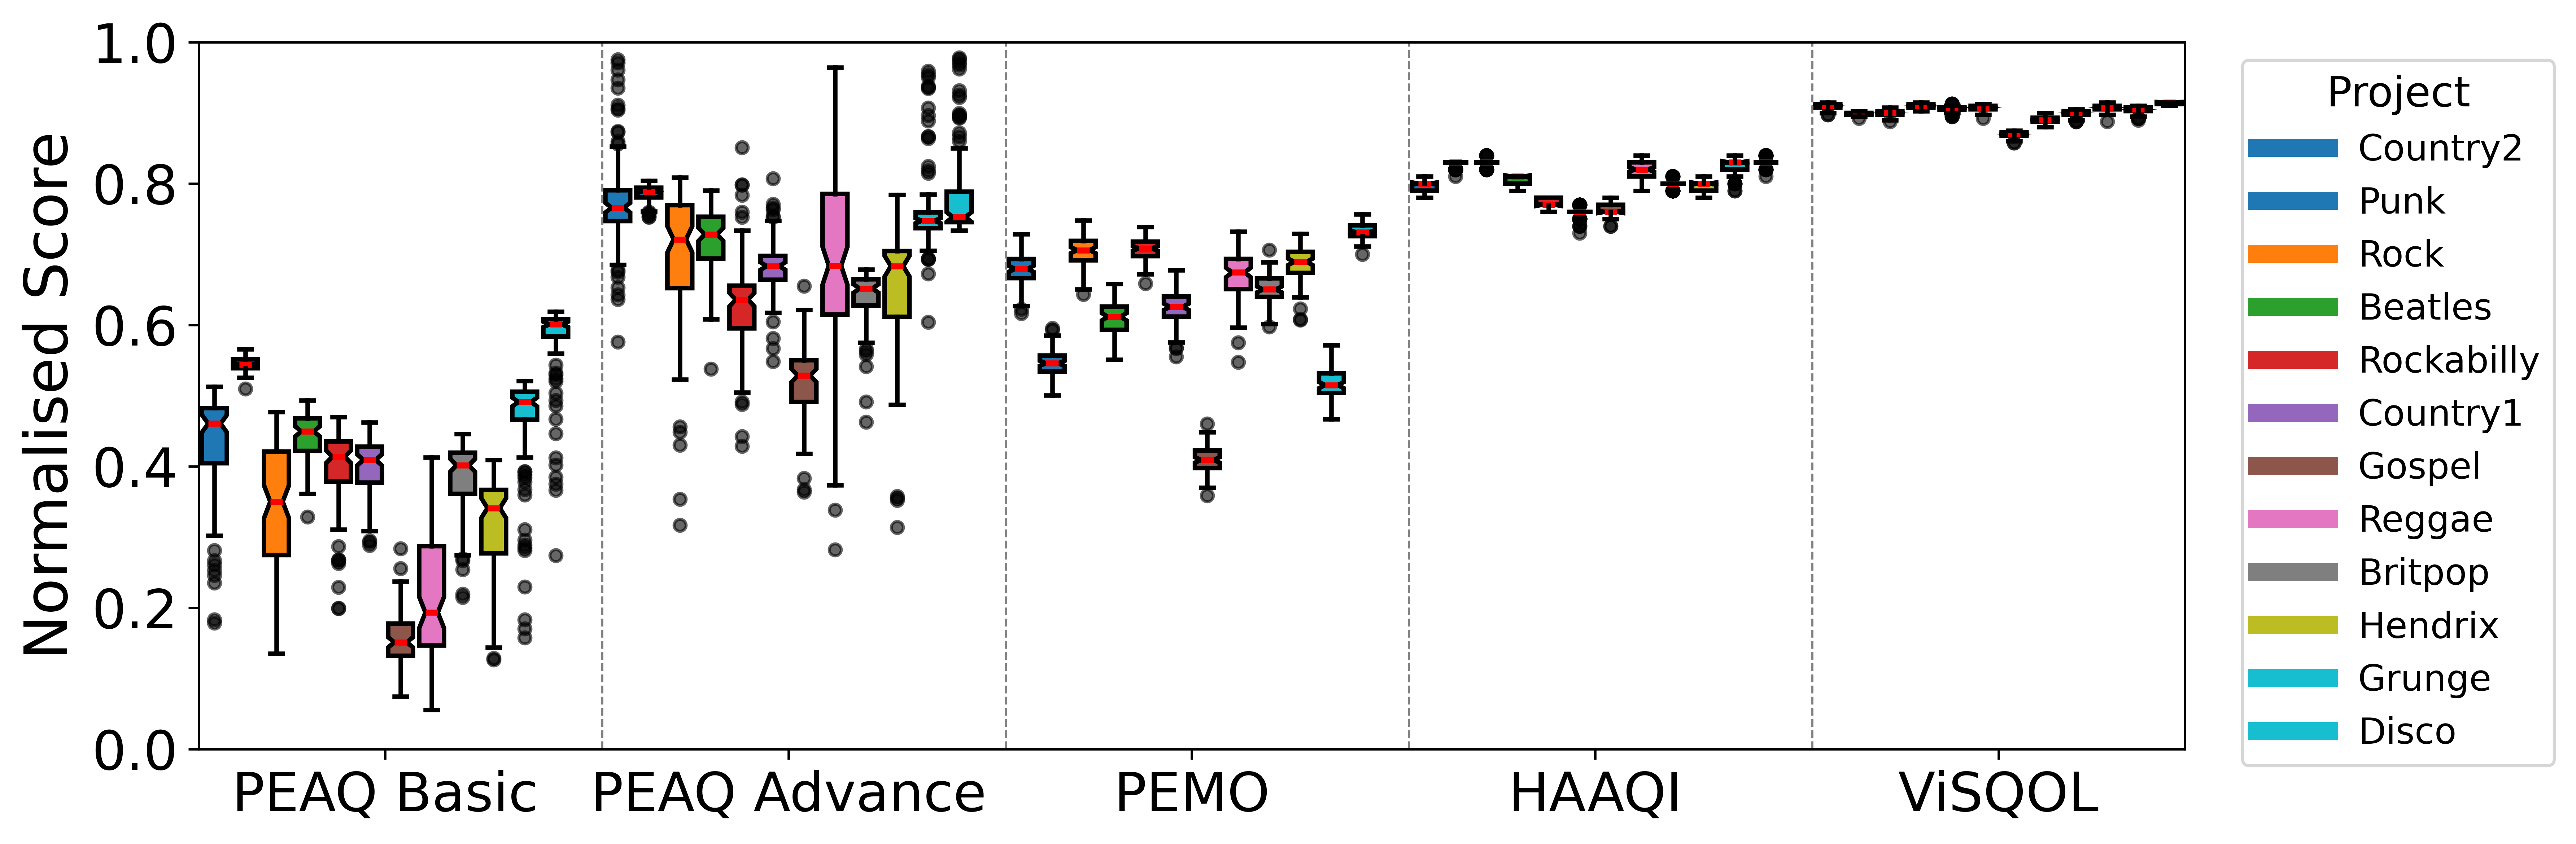

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np

# Base directory containing project subfolders
base_dir = Path('/home/codecrack/Jnotebook/DAFX25_48k_16')  # adjust to your root directory
projects = [p for p in base_dir.iterdir() if p.is_dir()]
project_names = [proj.name for proj in projects]

# Metrics and their filename patterns
metrics = {
    'PEAQ Basic': 'peaq_basic_vartest.csv',
    'PEAQ Advance': 'peaq_adv_vartest.csv',
    'PEMO': 'pemo_vartest.csv',
    'HAAQI': 'haaqi_vartest.csv',
    'ViSQOL': 'visqol_vartest.csv'
}

# Metrics requiring normalization
norm_metrics = {'PEAQ Basic', 'PEAQ Advance', 'PEMO', 'ViSQOL'}

# Load and normalize metric data
metric_data = {name: [] for name in metrics}
for proj in projects:
    for metric_name, fname in metrics.items():
        file_path = proj / fname
        if not file_path.exists():
            raise FileNotFoundError(f"Missing {fname} in project {proj.name}")
        if metric_name == 'PEMO':
            df = pd.read_csv(file_path, header=None)
            values = df.values.flatten()
        else:
            df = pd.read_csv(file_path)
            numeric_cols = df.select_dtypes(include='number').columns
            if not numeric_cols.any():
                raise ValueError(f"No numeric column found in {fname}")
            values = df[numeric_cols[0]].values
        if metric_name in norm_metrics:
            values = (values + 4) / 4
        metric_data[metric_name].append(values)


# Prepare for grouped boxplot
metrics_list = list(metric_data.keys())
num_metrics = len(metrics_list)
num_projects = len(project_names)

# Parameters for group spacing
group_width = len(projects) + 1  # leave one unit gap between groups

# Define metrics in desired order
metrics_list = ['PEAQ Basic', 'PEAQ Advance', 'PEMO', 'HAAQI', 'ViSQOL']

# Compute positions and flatten data
data_for_plot = []
positions = []
for i, metric_name in enumerate(metrics_list):
    start_pos = i * group_width
    for j in range(len(projects)):
        data_for_plot.append(metric_data[metric_name][j])
        positions.append(start_pos + j)

# Plot
plt.figure(figsize=(12, 4), dpi=600)
colors = plt.cm.tab10(np.linspace(0, 1, len(projects)))

# Include whiskers and caps styling
whisker_kw = dict(color='black', linewidth=1.5)
cap_kw     = dict(color='black', linewidth=1.5)

bp = plt.boxplot(
    data_for_plot,
    positions=positions,
    widths=0.8,
    patch_artist=True,
    showfliers=True,
    whis=1.5,
    boxprops=dict(color='black', linewidth=1.5),
    whiskerprops=dict(color='black', linewidth=1.5),
    capprops=dict(color='black', linewidth=1.5),
    medianprops=dict(color='red', linewidth=2),
    flierprops=dict(marker='o', markerfacecolor='black', markersize=4, linestyle='none', alpha=0.6),
    notch=True
)

# Color boxes per project index
for box, pos in zip(bp['boxes'], positions):
    # project index within each group
    j = pos % group_width
    box.set_facecolor(colors[j % len(projects)])
    box.set_edgecolor('black')

# Explicitly ensure whiskers and caps are rendered on top and in black
for whisker in bp['whiskers']:
    whisker.set(color='black', linewidth=1.5, zorder=3)
for cap in bp['caps']:
    cap.set(color='black', linewidth=1.5, zorder=3)

# Draw separators between metric groups
for i in range(1, len(metrics_list)):
    sep = i * group_width - 0.5
    plt.axvline(x=sep, color='gray', linestyle='--', linewidth=0.7)

# X-axis: center ticks below each metric group
tick_positions = [i * group_width + (len(projects)-1)/2 for i in range(len(metrics_list))]
plt.xticks(tick_positions, metrics_list, fontsize=18)

# Y-axis
plt.ylim(0, 1)
plt.yticks(fontsize=18)

# Legend with adjustable font size
handles = [plt.Line2D([0], [0], color=colors[idx], lw=6) for idx in range(len(projects))]
plt.legend(handles, project_names, fontsize=12, title='Project', title_fontsize=14,
           bbox_to_anchor=(1.02, 1), loc='upper left')

plt.ylabel('Normalised Score', fontsize=20)
plt.tight_layout()
plt.show()


In [28]:
from pathlib import Path
import pandas as pd
import numpy as np

# --- Configuration ---
base_dir = Path('/home/codecrack/Jnotebook/DAFX25_48k_16')   # adjust to your base directory
# collect all project folders except 'Avg'
projects = [p for p in base_dir.iterdir() 
            if p.is_dir() and p.name != 'Avg']

# mapping metric names to filenames
metrics = {
    'PEAQ Basic':    'peaq_basic_vartest.csv',
    'PEAQ Advance':  'peaq_adv_vartest.csv',
    'PEMO':          'pemo_vartest.csv',
    'HAAQI':         'haaqi_vartest.csv',
    'ViSQOL':        'visqol_vartest.csv'
}

# which metrics to normalize with (value + 4) / 4
norm_metrics = {'PEAQ Basic', 'PEAQ Advance', 'PEMO', 'ViSQOL'}

# --- Compute mean & std per project & per metric ---
mean_rows = []
std_rows  = []

for proj in projects:
    mrow = {'Project': proj.name}
    srow = {'Project': proj.name}
    for mname, fname in metrics.items():
        path = proj / fname
        if mname == 'PEMO':
            df = pd.read_csv(path, header=None)
            values = df.values.flatten()
        else:
            df = pd.read_csv(path)
            num_cols = df.select_dtypes(include='number').columns
            values = df[num_cols[0]].values
        
        # normalize if needed
        if mname in norm_metrics:
            values = (values + 4) / 4
        
        mrow[mname] = np.mean(values)
        srow[mname] = np.std(values, ddof=1)
    
    mean_rows.append(mrow)
    std_rows .append(srow)

# build DataFrames
mean_df = pd.DataFrame(mean_rows).set_index('Project')
std_df  = pd.DataFrame(std_rows ).set_index('Project')

# display
print("=== Mean per metric per project ===")
print(mean_df)
print("\n=== Std dev per metric per project ===")
print(std_df)


=== Mean per metric per project ===
            PEAQ Basic  PEAQ Advance      PEMO   HAAQI    ViSQOL
Project                                                         
Country2      0.429415      0.773143  0.678614  0.7969  0.909800
Punk          0.544665      0.785790  0.546823  0.8275  0.897725
Rock          0.341478      0.694938  0.703857  0.8289  0.899500
Beatles       0.442970      0.719435  0.609295  0.8050  0.909725
Rockabilly    0.397260      0.629145  0.706659  0.7727  0.905725
Country1      0.400090      0.682555  0.625004  0.7585  0.906825
Gospel        0.156235      0.519950  0.409696  0.7622  0.868925
Reggae        0.214957      0.693968  0.670830  0.8154  0.890225
Britpop       0.382168      0.639193  0.650974  0.7995  0.898800
Hendrix       0.319107      0.649813  0.686680  0.7979  0.906625
Grunge        0.461778      0.763370  0.516519  0.8257  0.904725
Disco         0.576978      0.782995  0.732879  0.8303  0.913950

=== Std dev per metric per project ===
            PE

In [30]:
std_df['PEAQ Basic'].mean(),std_df['PEAQ Advance'].mean(),std_df['PEMO'].mean(),std_df['HAAQI'].mean(),std_df['ViSQOL'].mean()

(0.05749372385085091,
 0.06529627655982262,
 0.021343417193740877,
 0.006625850325856619,
 0.0036422628568645895)